In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset as NetCDFFile
from copy import deepcopy

#import soc_analysis_lib as soca
#import isamcalc_lib as isam
#import socplot_lib as socplt
#import auxiliary_lib as au


In [18]:
# Open dat model output file
# Open the file list
tmp = np.loadtxt("list_turbel", delimiter='\n')

# Initialize arrays
fh_mod = deepcopy(tmp)
silt_mod = deepcopy(tmp)
sites = tmp.astype(int)
    
# Open the surface data and check the silt% of all samples
fsilt = './surfdata_05x05.nc'
nc=NetCDFFile(fsilt, 'r')
ncvar_silt = nc.variables['HWSD_SILT'][:]
latnc = nc.variables['lat'][:]
lonnc = nc.variables['lon'][:]
nc.close()

# Read in the location of all sites
floc = './turbel_position.csv'
site_loc = pd.read_csv(floc, encoding='iso-8859-1', index_col=0, header=None, names=['Lon', 'Lat'])

ind = 0
# Read the frost heave results and the correseponding silt percentage for the top layer
for i in sites:
    fname = './frost_heave_turbel_01_15/frost_heave_'+str(i)+'.dat'
    data_tmp = np.loadtxt(fname, delimiter='\n')
    fh_mod[ind] = np.sum(data_tmp)/15.
    longitude = site_loc.loc[i].Lon
    latitude = site_loc.loc[i].Lat
    silt_mod[ind] = ncvar_silt[0,latitude-1,longitude-1]
    ind = ind + 1
        

In [3]:
# Read in obs from technical report
filename = '../../data/site_froseheave/frostheave.csv'
site_fh = pd.read_csv(filename, encoding='iso-8859-1', skiprows=[1])
fh_obs = site_fh.Total_heave.as_matrix()


In [ ]:
# Add boxplot for the comparison of observed vs simulated frost heave rate

In [19]:
silt_mod

array([ 48.        ,  48.        ,  48.        ,  48.        ,
        48.        ,  19.        ,  63.        ,  46.        ,
        46.        ,  36.        ,  39.        ,  39.        ,
        36.        ,  36.        ,  46.        ,  39.        ,
        48.        ,  48.        ,  48.        ,  48.        ,
        48.        ,  48.        ,  48.        ,  48.        ,
        48.        ,  48.        ,  48.        ,  48.        ,
        48.        ,  48.        ,  48.        ,  48.        ,
        47.        ,  47.        ,  47.        ,  48.        ,
        48.        ,  48.        ,  48.        ,  48.        ,
        48.        ,  48.        ,  48.        ,  48.        ,
        48.        ,  48.        ,  48.        ,  63.        ,
        18.        ,  18.        ,  18.        ,  18.        ,
        47.        ,  47.        ,  47.        ,  47.        ,
        47.        ,  47.        ,  16.        ,  16.        ,
        16.        ,  16.        ,  16.        ,  16.  

In [21]:
fh_mod

array([  1.26681090e-01,   4.84523595e+00,   4.84523595e+00,
         8.39812644e+00,   8.13282999e+00,   9.63399891e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.36275065e+00,   8.43599883e+00,   2.82766828e-01,
         9.12692883e-01,   9.12692883e-01,   8.02498342e-01,
         2.82766828e-01,   4.58779292e+00,   3.25796201e+00,
         7.08393682e+00,   8.88340973e+00,   8.88340973e+00,
         9.12560205e+00,   9.12560205e+00,   3.05595693e+00,
         3.08028147e+00,   5.27045822e+00,   2.44075072e+00,
         9.86741440e+00,   8.39812644e+00,   1.17357356e-01,
         9.52552652e-01,   9.52552652e-01,   3.16167889e+00,
         1.27144253e-01,   3.16167889e+00,   9.52552652e-01,
         9.52552652e-01,   4.84523595e+00,   8.39812644e+00,
         8.39812644e+00,   8.39812644e+00,   8.39812644e+00,
         8.39812644e+00,   4.84523595e+00,   4.84523595e+00,
         4.84523595e+00,   4.84523595e+00,   6.17953280e+00,
         7.01268581e+00,

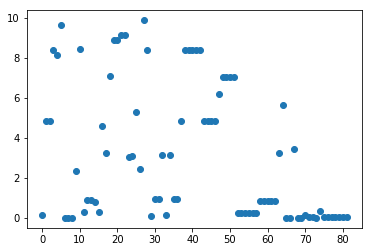

In [22]:
plt.plot(fh_mod, 'o')
plt.show()

In [24]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)




In [38]:
fig, ax = plt.subplots()
ax.boxplot([fh_obs, fh_mod])
ax.set_xticklabels(['Laboratory test', 'ISAM'], fontsize=16)
#plt.show()
plt.savefig('frost_results.png')

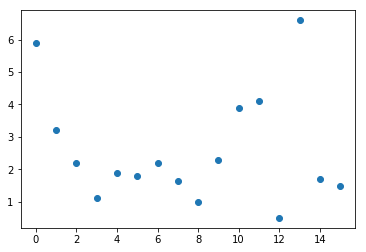

In [23]:
plt.plot(fh_obs, 'o')
plt.show()